Allen Hoskins 

DS7337: Natural Language Processing, Fall 2022

# <center> <u>Homework 7</u>

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.chunk import RegexpParser

import requests
from bs4 import BeautifulSoup as bs
import json

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud

import numpy as np
from bs4 import BeautifulSoup


# Cluster the reviews that you collected in homework 5, by doing the following:
1. In Python, select any one of the clustering methods covered in this course. Run it over the collection of reviews, and show at least two different ways of clustering the reviews, e.g., changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.  
2. Try to write a short phrase to characterize (give a natural interpretation of) what each cluster is generally centered on semantically. Is this hard to do in some cases? If so, make note of that fact. 
3. Explain which of the two clustering results from question 1 is preferable (if one of them is), and why. 

Submit all of your inputs and outputs and your code for this assignment, along with a brief written 

In [2]:
def return_permalinks(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    a_tags = soup.find_all("a")
    permalinks = []
    for tag in a_tags:
        if tag.get_text() == "Permalink":
            permalink = "https://www.imdb.com" + tag.attrs['href']
            permalinks.append(permalink)
    return permalinks

def return_all_permalinks(dict):
    all_permalinks = []
    for movie_name, review_page_link in dict.items():
        permalinks = return_permalinks(url=review_page_link)
        all_permalinks += permalinks
        title = ' '.join(movie_name.split("_")).title()
    return all_permalinks

In [3]:
review_pages = {'thor:_love_and_thunder':"https://www.imdb.com/title/tt10648342/reviews/?ref_=tt_ql_urv", 
                "the_lost_city":"https://www.imdb.com/title/tt13320622/reviews/?ref_=tt_ql_urv", 
                "deadpool_2":"https://www.imdb.com/title/tt5463162/reviews/?ref_=tt_ql_urv", 
                "deadpool":"https://www.imdb.com/title/tt1431045/reviews/?ref_=tt_ql_urv", 
                "land_of_the_lost":"https://www.imdb.com/title/tt0457400/reviews/?ref_=tt_ql_urv", 
                "free_guy":"https://www.imdb.com/title/tt6264654/reviews/?ref_=tt_ql_urv", 
                "the_suicide_squad":"https://www.imdb.com/title/tt6334354/reviews/?ref_=tt_ql_urv",
                "guardians_of_the_galaxy":"https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ql_urv"}

plinks = return_all_permalinks(dict=review_pages)

In [4]:

def get_reviews(link):
    response = requests.get(link)
    soup = BeautifulSoup(response.content, "html.parser")
    review_texts = []
    for s in soup.find_all('script'):
        if s.has_attr('type'):
            if s.attrs['type'] == "application/ld+json":
                tag_json = json.loads(s.get_text())
                if "reviewBody" in tag_json.keys():
                    body = tag_json['reviewBody']
                    review_texts.append(body)
    return review_texts

In [5]:
reviews = [get_reviews(link=url) for url in plinks]
texts = [txt[0] for txt in reviews if len(txt) != 0]

In [6]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(texts)

In [7]:
print(X.shape)

(164, 4919)


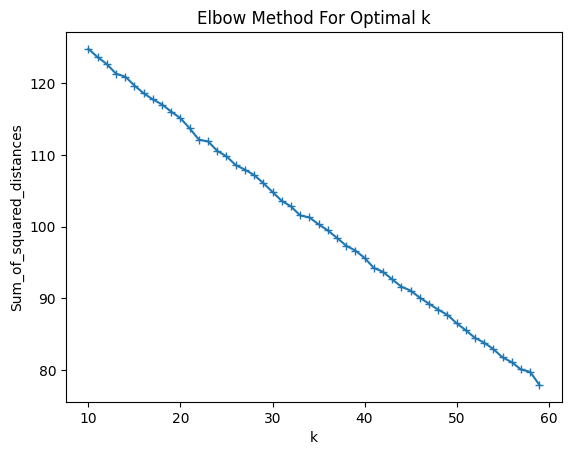

In [8]:
ss_d = []
K = range(10,60)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   ss_d.append(km.inertia_)
plt.plot(K, ss_d, '+-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## K = 18

In [9]:
true_k = 18
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_

In [10]:
df = pd.DataFrame(list(zip(labels, plinks, texts)), columns=['cluster', 'permalinks','reviews'])
df.sort_values(by='cluster')

cluster                              permalinks  \
35         0  https://www.imdb.com/review/rw8091699/   
56         1  https://www.imdb.com/review/rw5984758/   
125        2  https://www.imdb.com/review/rw7264188/   
15         2  https://www.imdb.com/review/rw8304194/   
163        3  https://www.imdb.com/review/rw7258075/   
..       ...                                     ...   
127       14  https://www.imdb.com/review/rw7219673/   
1         14  https://www.imdb.com/review/rw8309971/   
145       15  https://www.imdb.com/review/rw7218212/   
13        16  https://www.imdb.com/review/rw8313711/   
26        17  https://www.imdb.com/review/rw8004095/   

                                               reviews  
35   The amazing thing about this film -- despite t...  
56   I thought the first one was decent but way too...  
125  The first SS was a real idiocy, but this new p...  
15   ..and yet, this is all so very familiar.\n\nLo...  
163  In 1988, on Earth, the boy Peter Quill is abdu...  
..                                                 ...  
127  Before you think "Yea. We know. It's stupid. T...  
1    Christian Bale is great, Russell Crowe has a g...  
145  This film is perfect entertainment. Sheer blis...  
13   String of jokes and gags. Bland fight sequence...  
26   A cute and funny enough rom com, a few more of...  

[164 rows x 3 columns]

Cluster: 0
IMDB Review Links
https://www.imdb.com/review/rw8091699/
IMDB Review Texts


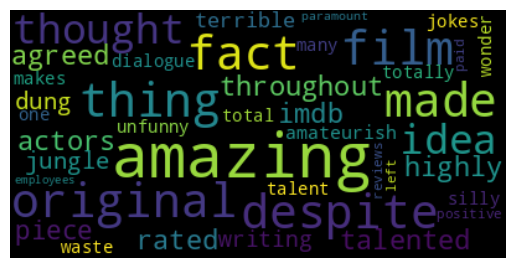

Cluster: 1
IMDB Review Links
https://www.imdb.com/review/rw5984758/
IMDB Review Texts


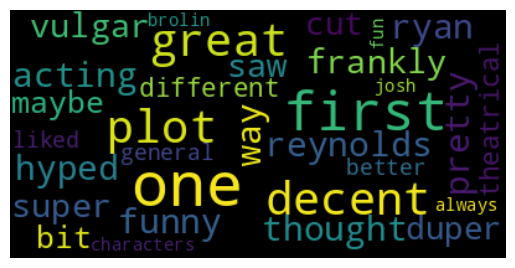

Cluster: 2
IMDB Review Links
https://www.imdb.com/review/rw8304194/
https://www.imdb.com/review/rw7264188/
IMDB Review Texts


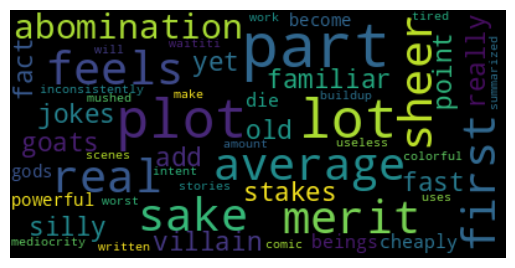

Cluster: 3
IMDB Review Links
https://www.imdb.com/review/rw7209276/
https://www.imdb.com/review/rw7262327/
https://www.imdb.com/review/rw7258075/
IMDB Review Texts


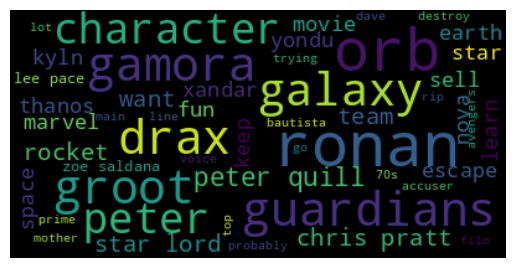

Cluster: 4
IMDB Review Links
https://www.imdb.com/review/rw8146008/
https://www.imdb.com/review/rw4297422/
https://www.imdb.com/review/rw4855093/
https://www.imdb.com/review/rw8516528/
https://www.imdb.com/review/rw3598955/
IMDB Review Texts


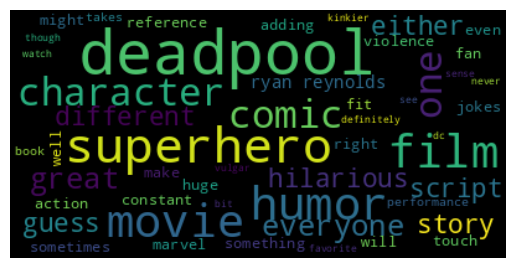

Cluster: 5
IMDB Review Links
https://www.imdb.com/review/rw2085350/
https://www.imdb.com/review/rw7268762/
https://www.imdb.com/review/rw7394661/
https://www.imdb.com/review/rw7248676/
https://www.imdb.com/review/rw7204092/
https://www.imdb.com/review/rw7562236/
https://www.imdb.com/review/rw7224587/
https://www.imdb.com/review/rw7207923/
IMDB Review Texts


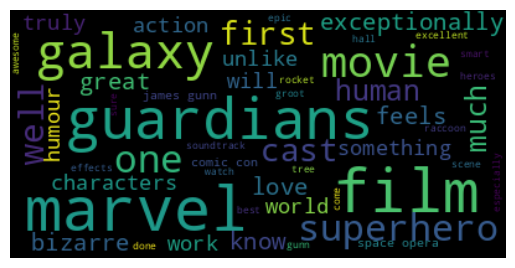

Cluster: 6
IMDB Review Links
https://www.imdb.com/review/rw8332897/
https://www.imdb.com/review/rw7292882/
IMDB Review Texts


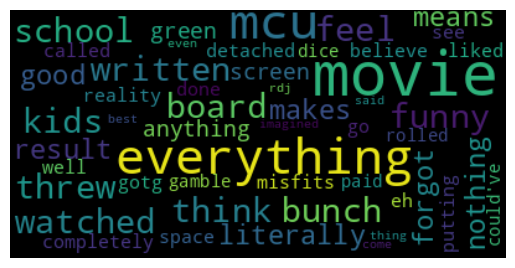

Cluster: 7
IMDB Review Links
https://www.imdb.com/review/rw8315692/
https://www.imdb.com/review/rw8314433/
https://www.imdb.com/review/rw8312037/
https://www.imdb.com/review/rw8525634/
https://www.imdb.com/review/rw8311274/
https://www.imdb.com/review/rw8312102/
https://www.imdb.com/review/rw8524888/
https://www.imdb.com/review/rw8304711/
https://www.imdb.com/review/rw8002890/
https://www.imdb.com/review/rw8004578/
https://www.imdb.com/review/rw8000197/
https://www.imdb.com/review/rw8602658/
https://www.imdb.com/review/rw8009712/
https://www.imdb.com/review/rw8136793/
https://www.imdb.com/review/rw8147816/
https://www.imdb.com/review/rw8093742/
https://www.imdb.com/review/rw5733933/
https://www.imdb.com/review/rw7293764/
https://www.imdb.com/review/rw4184836/
https://www.imdb.com/review/rw4624413/
https://www.imdb.com/review/rw3756090/
https://www.imdb.com/review/rw2079935/
https://www.imdb.com/review/rw2076017/
https://www.imdb.com/review/rw2309229/
https://www.imdb.com/review/rw27022

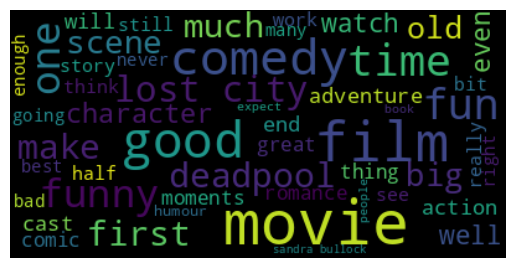

Cluster: 8
IMDB Review Links
https://www.imdb.com/review/rw7323151/
https://www.imdb.com/review/rw3551439/
https://www.imdb.com/review/rw5839124/
https://www.imdb.com/review/rw3416540/
https://www.imdb.com/review/rw2260646/
https://www.imdb.com/review/rw7399273/
https://www.imdb.com/review/rw7997819/
IMDB Review Texts


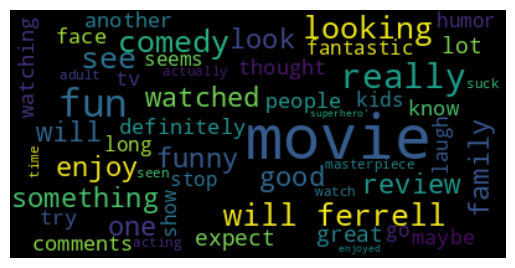

Cluster: 9
IMDB Review Links
https://www.imdb.com/review/rw8334081/
https://www.imdb.com/review/rw8318859/
https://www.imdb.com/review/rw8329077/
https://www.imdb.com/review/rw8310746/
https://www.imdb.com/review/rw8307205/
https://www.imdb.com/review/rw8093318/
https://www.imdb.com/review/rw8580474/
https://www.imdb.com/review/rw8136044/
https://www.imdb.com/review/rw8136345/
https://www.imdb.com/review/rw8003034/
https://www.imdb.com/review/rw8014072/
https://www.imdb.com/review/rw8007627/
https://www.imdb.com/review/rw8608885/
https://www.imdb.com/review/rw8074452/
https://www.imdb.com/review/rw8153642/
https://www.imdb.com/review/rw8010549/
https://www.imdb.com/review/rw6118931/
https://www.imdb.com/review/rw6454784/
https://www.imdb.com/review/rw4695639/
https://www.imdb.com/review/rw6570383/
https://www.imdb.com/review/rw4300927/
https://www.imdb.com/review/rw6981276/
https://www.imdb.com/review/rw4379195/
https://www.imdb.com/review/rw4174623/
https://www.imdb.com/review/rw69710

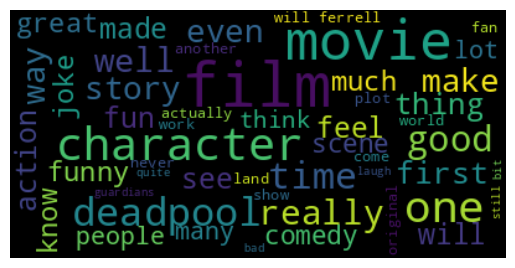

Cluster: 10
IMDB Review Links
https://www.imdb.com/review/rw7999963/
https://www.imdb.com/review/rw4602468/
IMDB Review Texts


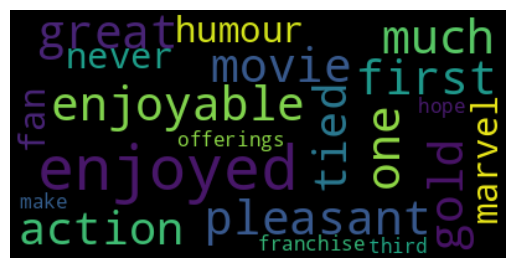

Cluster: 11
IMDB Review Links
https://www.imdb.com/review/rw7999344/
https://www.imdb.com/review/rw8221725/
IMDB Review Texts


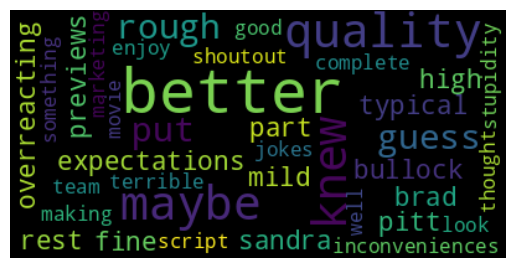

Cluster: 12
IMDB Review Links
https://www.imdb.com/review/rw7547550/
IMDB Review Texts


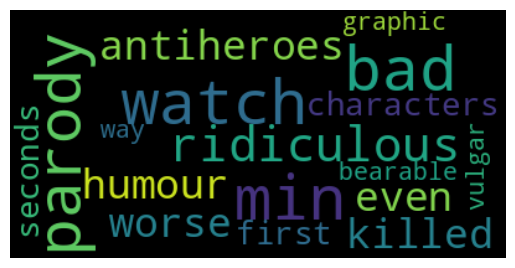

Cluster: 13
IMDB Review Links
https://www.imdb.com/review/rw8310329/
https://www.imdb.com/review/rw8351608/
https://www.imdb.com/review/rw8313357/
https://www.imdb.com/review/rw8323305/
https://www.imdb.com/review/rw8315634/
https://www.imdb.com/review/rw8311620/
https://www.imdb.com/review/rw8306334/
https://www.imdb.com/review/rw8331400/
https://www.imdb.com/review/rw4064836/
https://www.imdb.com/review/rw7226928/
https://www.imdb.com/review/rw7432411/
https://www.imdb.com/review/rw7227994/
IMDB Review Texts


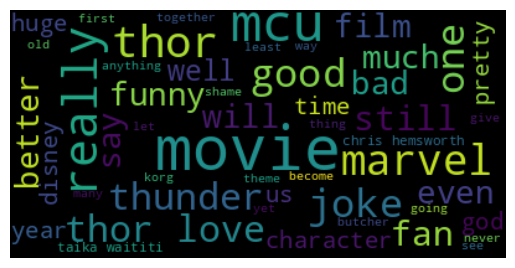

Cluster: 14
IMDB Review Links
https://www.imdb.com/review/rw8309971/
https://www.imdb.com/review/rw7219673/
IMDB Review Texts


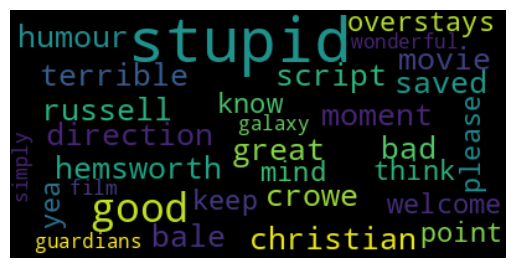

Cluster: 15
IMDB Review Links
https://www.imdb.com/review/rw7218212/
IMDB Review Texts


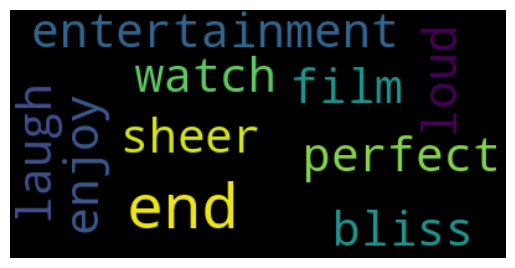

Cluster: 16
IMDB Review Links
https://www.imdb.com/review/rw8313711/
IMDB Review Texts


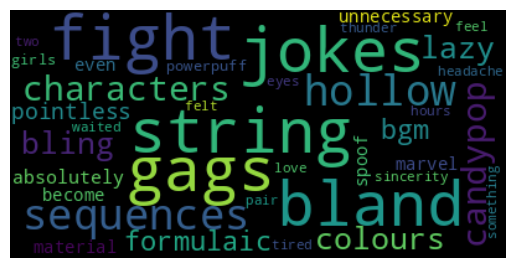

Cluster: 17
IMDB Review Links
https://www.imdb.com/review/rw8004095/
IMDB Review Texts


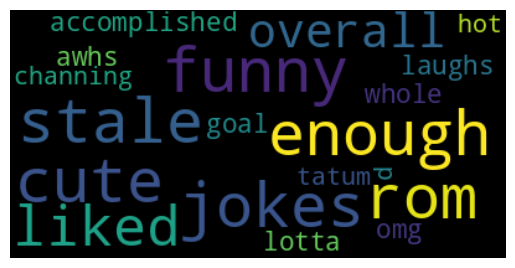

In [11]:
for k in range(0,true_k):
    s=df[df.cluster==k]
    text=s['reviews'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text)
    print('Cluster: {}'.format(k))
    print('IMDB Review Links')
    revs=df[df.cluster==k]['permalinks']
    print(revs.to_string(index=False))
    print('IMDB Review Texts')
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## K = 12

In [12]:
pd.set_option('display.max_columns', 500)

In [13]:
true_k = 60
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_

In [14]:
df = pd.DataFrame(list(zip(labels,plinks, texts)),columns=['cluster','permalinks','reviews'])
df.sort_values(by='cluster')

cluster                              permalinks  \
59         0  https://www.imdb.com/review/rw4297422/   
129        1  https://www.imdb.com/review/rw7898908/   
142        1  https://www.imdb.com/review/rw7379951/   
83         1  https://www.imdb.com/review/rw6820154/   
122        1  https://www.imdb.com/review/rw2252934/   
..       ...                                     ...   
163       55  https://www.imdb.com/review/rw7258075/   
98        56  https://www.imdb.com/review/rw4064836/   
77        57  https://www.imdb.com/review/rw3598955/   
34        58  https://www.imdb.com/review/rw8000197/   
4         59  https://www.imdb.com/review/rw8334081/   

                                               reviews  
59   So thin storyline and guess the writer don't h...  
129  The Suicide Squad (2021) is a movie we saw las...  
142  It is a very fun and entertaining film. The st...  
83   This film actually became a lot more fun when ...  
122  I have to admit I don't like the first Suicide...  
..                                                 ...  
163  In 1988, on Earth, the boy Peter Quill is abdu...  
98   Super funny and I can't believe it came out 10...  
77   With a brilliant script, visceral action, and ...  
34   This is a low budget, mediocre, lazy effort wi...  
4    Movie is okay. Christian Bale is awesome, Chri...  

[164 rows x 3 columns]

Cluster: 0
IMDB Review Links
https://www.imdb.com/review/rw4297422/
IMDB Review Texts


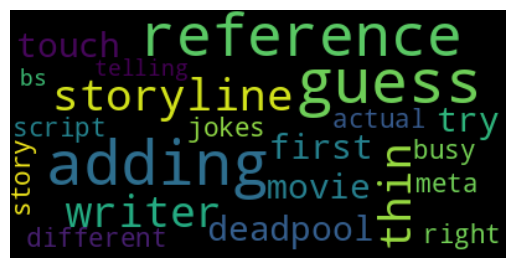

Cluster: 1
IMDB Review Links
https://www.imdb.com/review/rw4182610/
https://www.imdb.com/review/rw6820154/
https://www.imdb.com/review/rw4009143/
https://www.imdb.com/review/rw2076025/
https://www.imdb.com/review/rw2076741/
https://www.imdb.com/review/rw2252934/
https://www.imdb.com/review/rw7898908/
https://www.imdb.com/review/rw7234711/
https://www.imdb.com/review/rw7268762/
https://www.imdb.com/review/rw7379951/
https://www.imdb.com/review/rw7564102/
https://www.imdb.com/review/rw7207923/
IMDB Review Texts


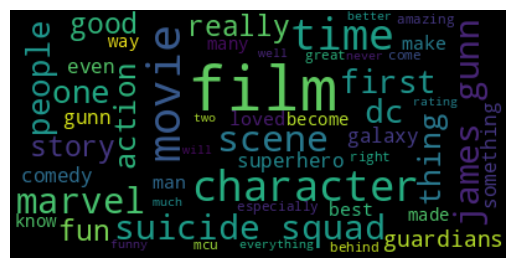

Cluster: 2
IMDB Review Links
https://www.imdb.com/review/rw8003034/
https://www.imdb.com/review/rw7997819/
https://www.imdb.com/review/rw8011549/
https://www.imdb.com/review/rw7208841/
IMDB Review Texts


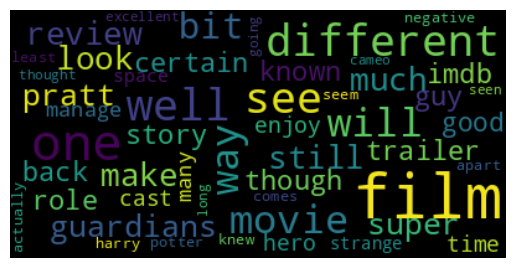

Cluster: 3
IMDB Review Links
https://www.imdb.com/review/rw7999963/
https://www.imdb.com/review/rw7323151/
IMDB Review Texts


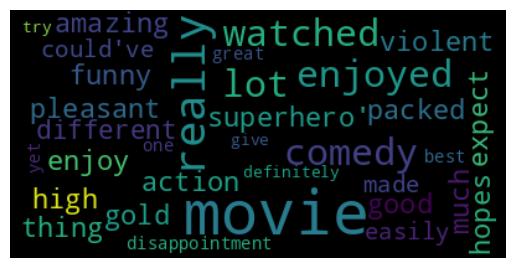

Cluster: 4
IMDB Review Links
https://www.imdb.com/review/rw8310329/
https://www.imdb.com/review/rw8323305/
https://www.imdb.com/review/rw8331400/
https://www.imdb.com/review/rw7227994/
IMDB Review Texts


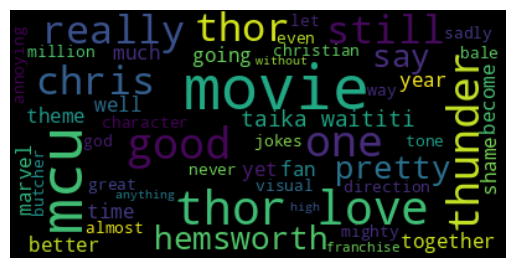

Cluster: 5
IMDB Review Links
https://www.imdb.com/review/rw7200780/
https://www.imdb.com/review/rw7174916/
IMDB Review Texts


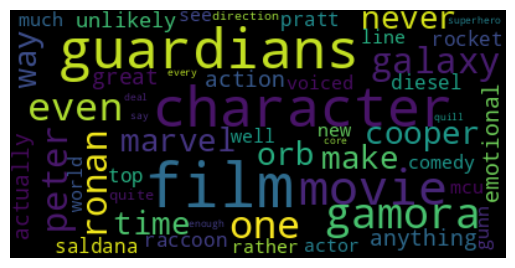

Cluster: 6
IMDB Review Links
https://www.imdb.com/review/rw8221725/
IMDB Review Texts


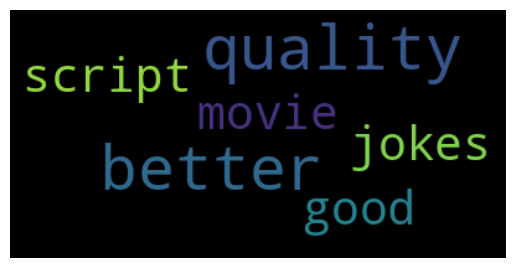

Cluster: 7
IMDB Review Links
https://www.imdb.com/review/rw8147816/
https://www.imdb.com/review/rw2677074/
IMDB Review Texts


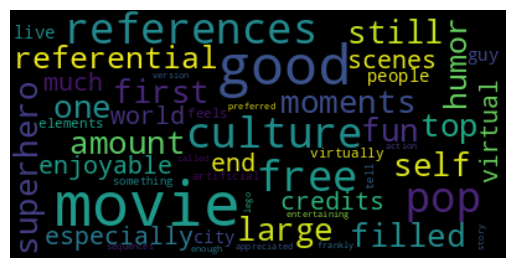

Cluster: 8
IMDB Review Links
https://www.imdb.com/review/rw8146008/
https://www.imdb.com/review/rw5733933/
https://www.imdb.com/review/rw4379195/
https://www.imdb.com/review/rw4855093/
https://www.imdb.com/review/rw8314382/
https://www.imdb.com/review/rw7158230/
https://www.imdb.com/review/rw4209571/
https://www.imdb.com/review/rw4161726/
https://www.imdb.com/review/rw4624413/
https://www.imdb.com/review/rw7224587/
IMDB Review Texts


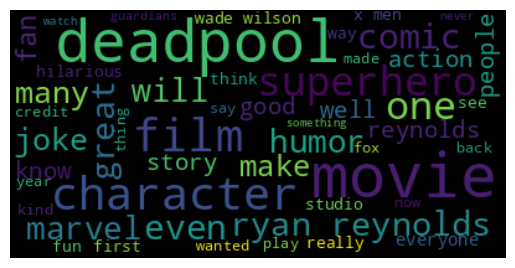

Cluster: 9
IMDB Review Links
https://www.imdb.com/review/rw7219673/
IMDB Review Texts


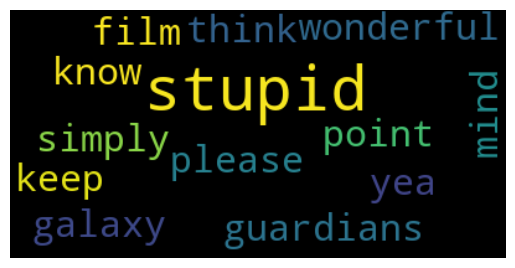

Cluster: 10
IMDB Review Links
https://www.imdb.com/review/rw3586681/
https://www.imdb.com/review/rw2260646/
IMDB Review Texts


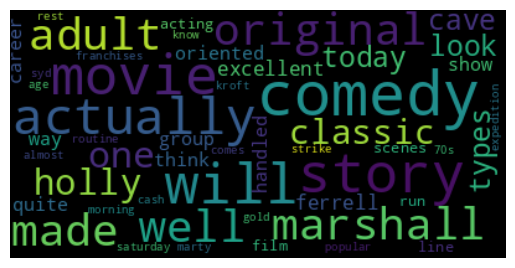

Cluster: 11
IMDB Review Links
https://www.imdb.com/review/rw8318859/
https://www.imdb.com/review/rw8093318/
https://www.imdb.com/review/rw8014072/
https://www.imdb.com/review/rw8136793/
https://www.imdb.com/review/rw8010549/
https://www.imdb.com/review/rw8093742/
https://www.imdb.com/review/rw6118931/
https://www.imdb.com/review/rw6454784/
https://www.imdb.com/review/rw5984758/
https://www.imdb.com/review/rw6570383/
https://www.imdb.com/review/rw4300927/
https://www.imdb.com/review/rw6981276/
https://www.imdb.com/review/rw4174623/
https://www.imdb.com/review/rw6971097/
https://www.imdb.com/review/rw3415632/
https://www.imdb.com/review/rw2252940/
https://www.imdb.com/review/rw7264188/
IMDB Review Texts


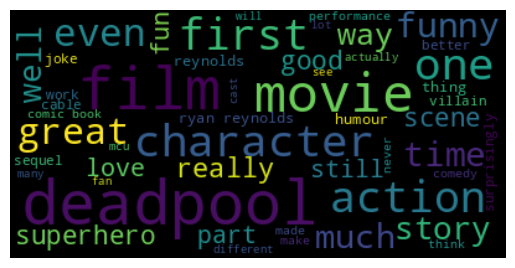

Cluster: 12
IMDB Review Links
https://www.imdb.com/review/rw3708156/
https://www.imdb.com/review/rw3551439/
https://www.imdb.com/review/rw3595803/
https://www.imdb.com/review/rw7098080/
https://www.imdb.com/review/rw3414913/
https://www.imdb.com/review/rw3419493/
IMDB Review Texts


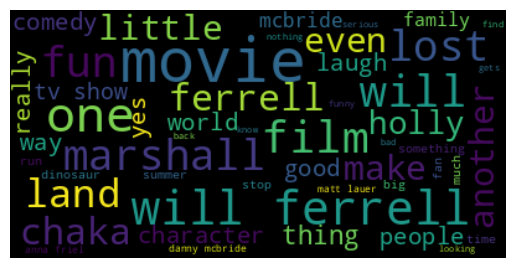

Cluster: 13
IMDB Review Links
https://www.imdb.com/review/rw7240092/
IMDB Review Texts


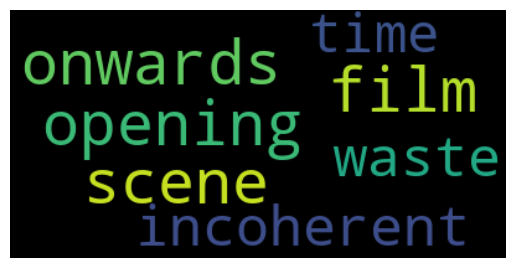

Cluster: 14
IMDB Review Links
https://www.imdb.com/review/rw8309971/
IMDB Review Texts


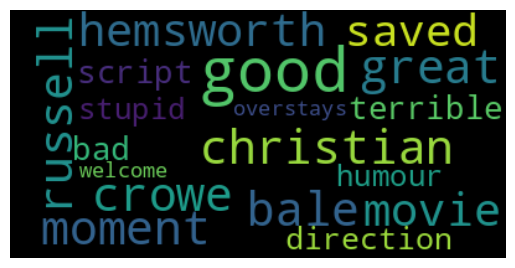

Cluster: 15
IMDB Review Links
https://www.imdb.com/review/rw7218212/
IMDB Review Texts


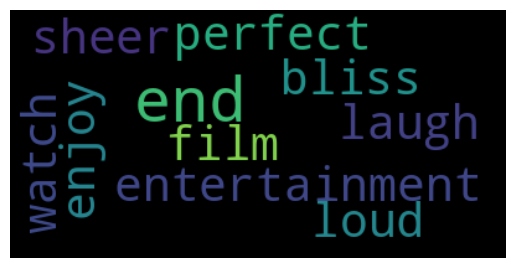

Cluster: 16
IMDB Review Links
https://www.imdb.com/review/rw6124126/
https://www.imdb.com/review/rw2864656/
https://www.imdb.com/review/rw2715924/
https://www.imdb.com/review/rw2079109/
https://www.imdb.com/review/rw7233503/
IMDB Review Texts


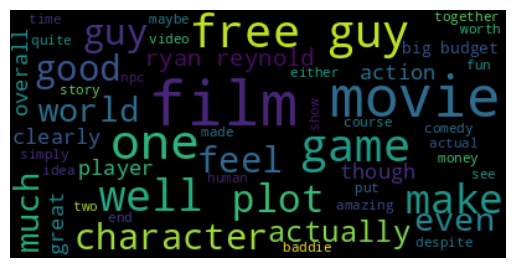

Cluster: 17
IMDB Review Links
https://www.imdb.com/review/rw8307205/
https://www.imdb.com/review/rw8608885/
https://www.imdb.com/review/rw7293764/
https://www.imdb.com/review/rw4184836/
https://www.imdb.com/review/rw5839124/
https://www.imdb.com/review/rw3410774/
https://www.imdb.com/review/rw5084366/
https://www.imdb.com/review/rw6720554/
https://www.imdb.com/review/rw3018750/
https://www.imdb.com/review/rw7230233/
https://www.imdb.com/review/rw7235565/
https://www.imdb.com/review/rw7861137/
https://www.imdb.com/review/rw7558618/
IMDB Review Texts


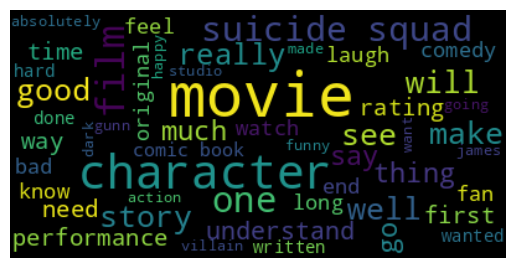

Cluster: 18
IMDB Review Links
https://www.imdb.com/review/rw3308901/
IMDB Review Texts


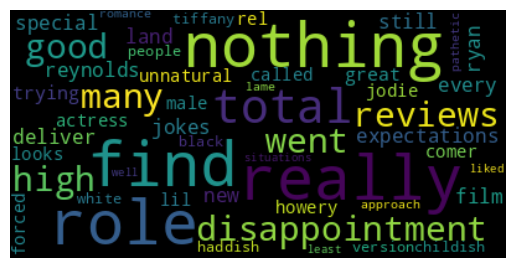

Cluster: 19
IMDB Review Links
https://www.imdb.com/review/rw2702243/
IMDB Review Texts


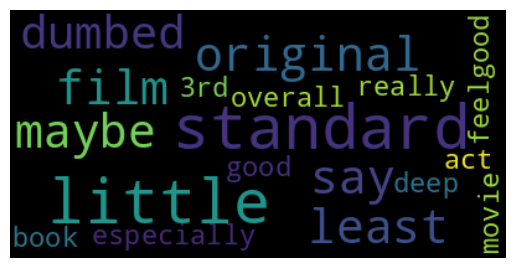

Cluster: 20
IMDB Review Links
https://www.imdb.com/review/rw2309229/
IMDB Review Texts


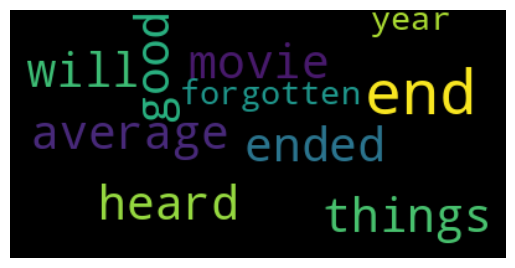

Cluster: 21
IMDB Review Links
https://www.imdb.com/review/rw8580474/
IMDB Review Texts


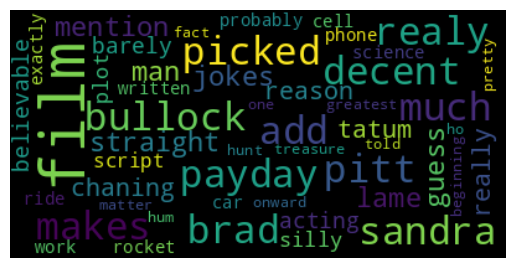

Cluster: 22
IMDB Review Links
https://www.imdb.com/review/rw8314433/
https://www.imdb.com/review/rw8312037/
https://www.imdb.com/review/rw8525634/
https://www.imdb.com/review/rw8311274/
https://www.imdb.com/review/rw8312102/
https://www.imdb.com/review/rw8524888/
https://www.imdb.com/review/rw8304711/
https://www.imdb.com/review/rw8004578/
https://www.imdb.com/review/rw8009712/
https://www.imdb.com/review/rw3756090/
IMDB Review Texts


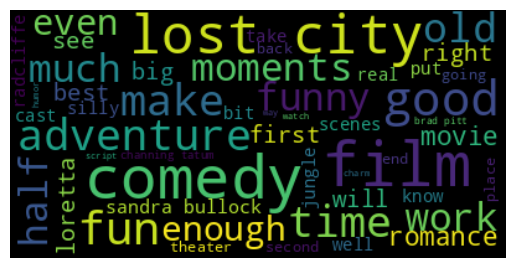

Cluster: 23
IMDB Review Links
https://www.imdb.com/review/rw7248676/
IMDB Review Texts


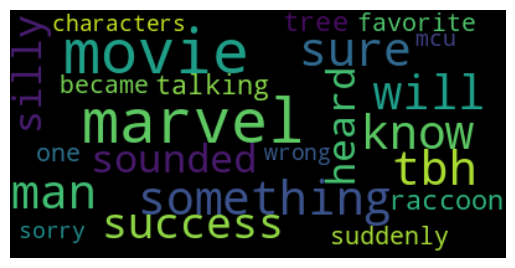

Cluster: 24
IMDB Review Links
https://www.imdb.com/review/rw3413536/
IMDB Review Texts


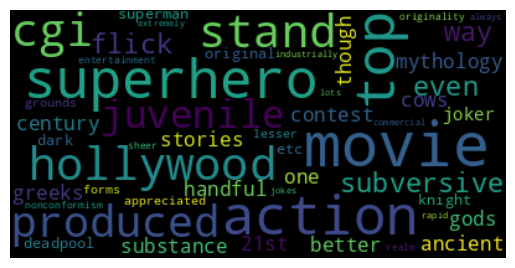

Cluster: 25
IMDB Review Links
https://www.imdb.com/review/rw8315692/
IMDB Review Texts


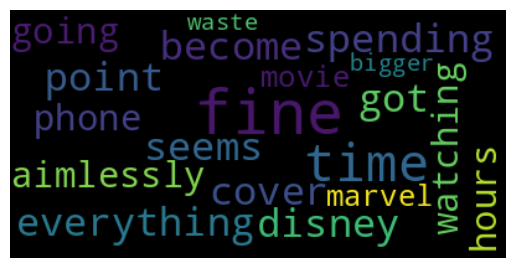

Cluster: 26
IMDB Review Links
https://www.imdb.com/review/rw8002890/
IMDB Review Texts


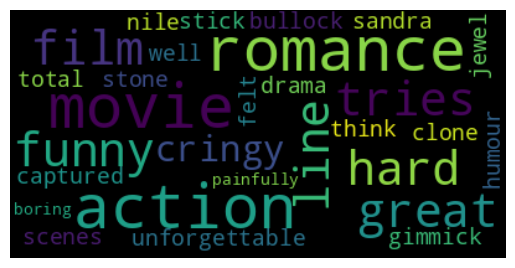

Cluster: 27
IMDB Review Links
https://www.imdb.com/review/rw8329077/
https://www.imdb.com/review/rw8304194/
https://www.imdb.com/review/rw8136044/
https://www.imdb.com/review/rw8091699/
https://www.imdb.com/review/rw8007627/
https://www.imdb.com/review/rw8074452/
https://www.imdb.com/review/rw8153642/
https://www.imdb.com/review/rw4150748/
https://www.imdb.com/review/rw7736031/
https://www.imdb.com/review/rw6923557/
https://www.imdb.com/review/rw7293763/
https://www.imdb.com/review/rw3411582/
https://www.imdb.com/review/rw3564194/
https://www.imdb.com/review/rw5188355/
https://www.imdb.com/review/rw3415728/
https://www.imdb.com/review/rw3727595/
https://www.imdb.com/review/rw5346447/
https://www.imdb.com/review/rw2077072/
https://www.imdb.com/review/rw5418679/
https://www.imdb.com/review/rw7386465/
https://www.imdb.com/review/rw7400811/
https://www.imdb.com/review/rw7237213/
https://www.imdb.com/review/rw7204092/
https://www.imdb.com/review/rw7230542/
IMDB Review Texts


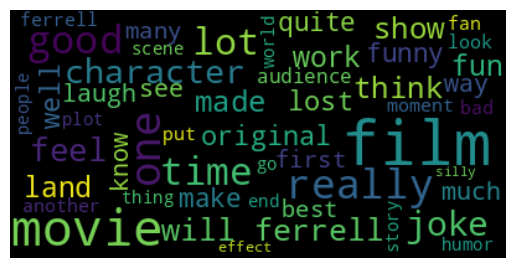

Cluster: 28
IMDB Review Links
https://www.imdb.com/review/rw8315634/
IMDB Review Texts


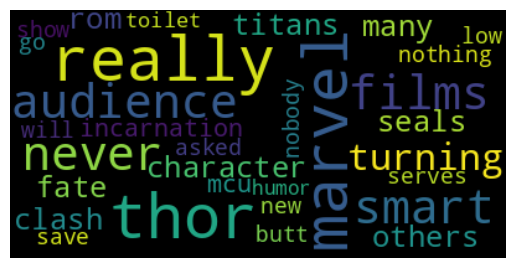

Cluster: 29
IMDB Review Links
https://www.imdb.com/review/rw2079935/
IMDB Review Texts


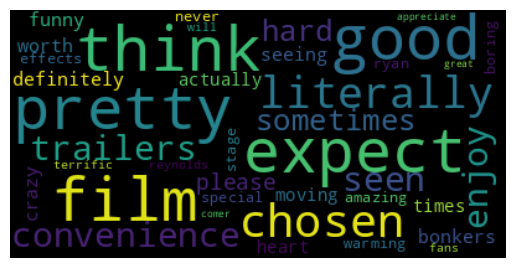

Cluster: 30
IMDB Review Links
https://www.imdb.com/review/rw4695639/
IMDB Review Texts


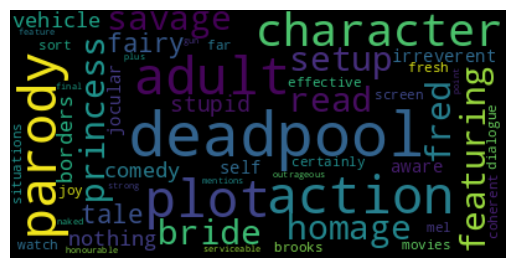

Cluster: 31
IMDB Review Links
https://www.imdb.com/review/rw8516528/
IMDB Review Texts


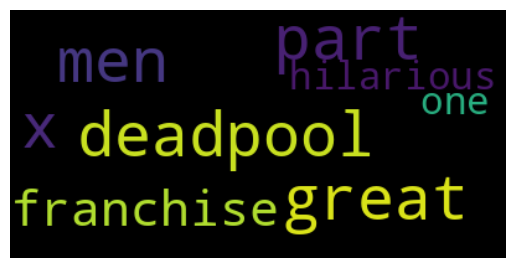

Cluster: 32
IMDB Review Links
https://www.imdb.com/review/rw7547550/
IMDB Review Texts


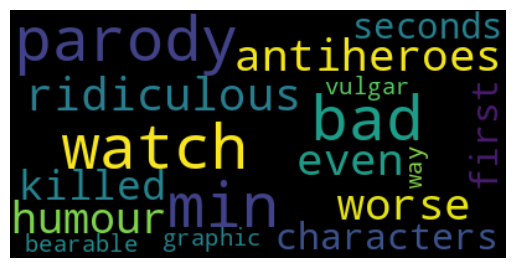

Cluster: 33
IMDB Review Links
https://www.imdb.com/review/rw8136345/
IMDB Review Texts


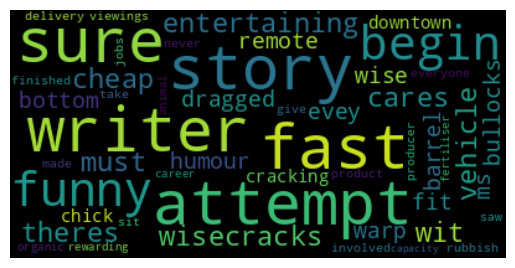

Cluster: 34
IMDB Review Links
https://www.imdb.com/review/rw8332897/
https://www.imdb.com/review/rw7292882/
IMDB Review Texts


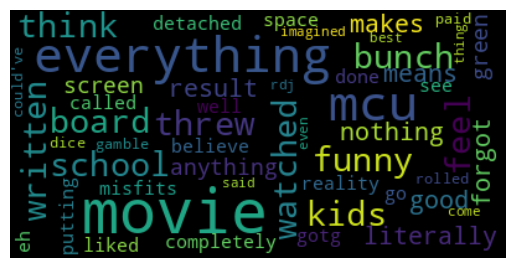

Cluster: 35
IMDB Review Links
https://www.imdb.com/review/rw8313357/
IMDB Review Texts


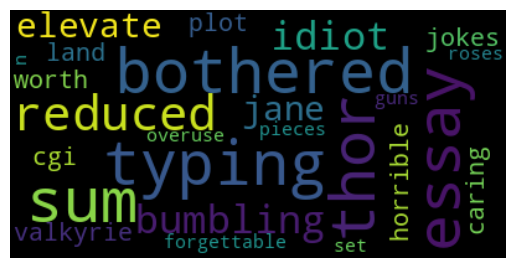

Cluster: 36
IMDB Review Links
https://www.imdb.com/review/rw2085350/
IMDB Review Texts


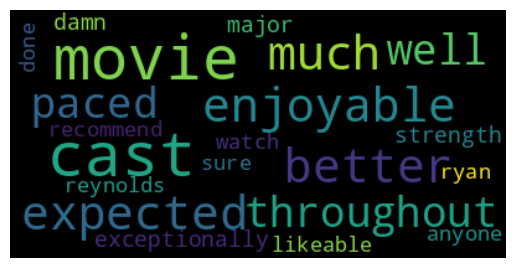

Cluster: 37
IMDB Review Links
https://www.imdb.com/review/rw8004095/
IMDB Review Texts


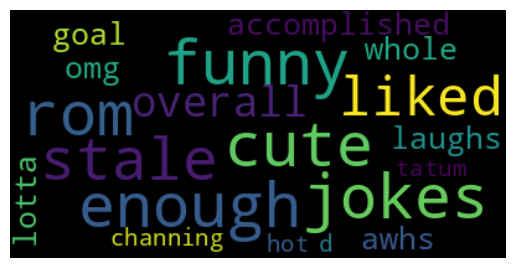

Cluster: 38
IMDB Review Links
https://www.imdb.com/review/rw7394661/
https://www.imdb.com/review/rw7562236/
IMDB Review Texts


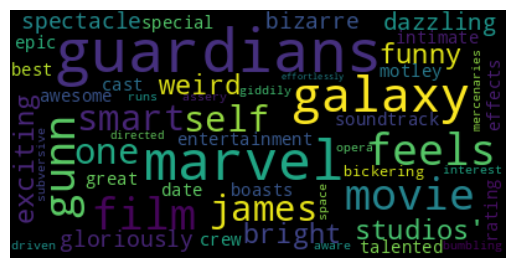

Cluster: 39
IMDB Review Links
https://www.imdb.com/review/rw2076017/
IMDB Review Texts


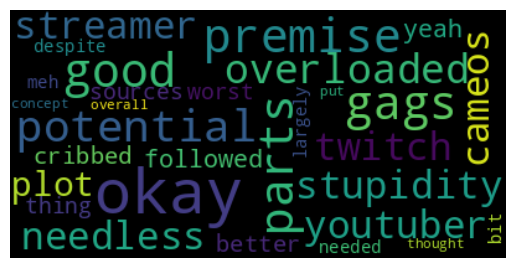

Cluster: 40
IMDB Review Links
https://www.imdb.com/review/rw8351608/
IMDB Review Texts


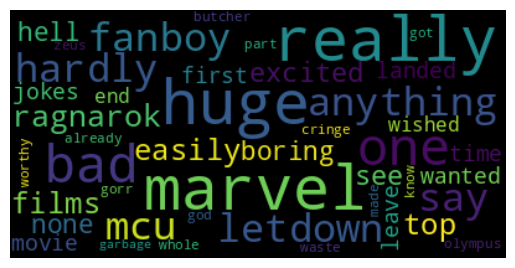

Cluster: 41
IMDB Review Links
https://www.imdb.com/review/rw7399273/
IMDB Review Texts


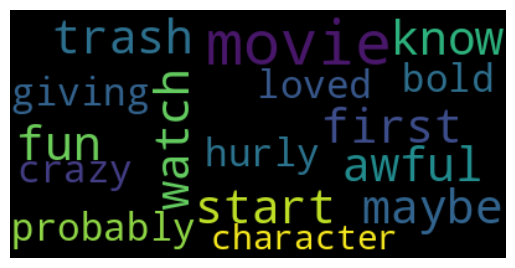

Cluster: 42
IMDB Review Links
https://www.imdb.com/review/rw8602658/
IMDB Review Texts


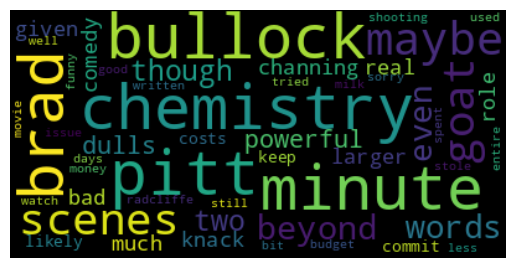

Cluster: 43
IMDB Review Links
https://www.imdb.com/review/rw8306334/
IMDB Review Texts


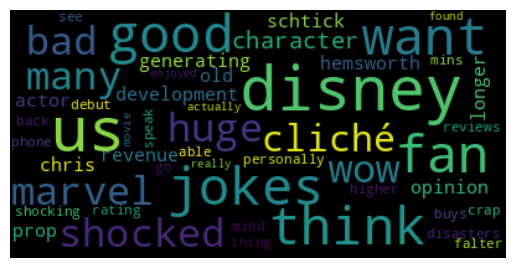

Cluster: 44
IMDB Review Links
https://www.imdb.com/review/rw8311620/
IMDB Review Texts


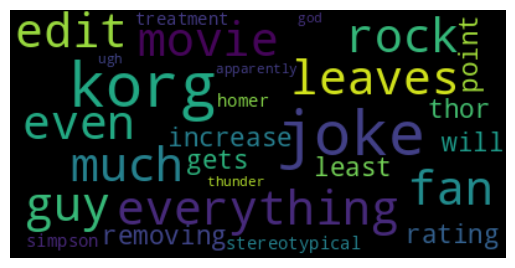

Cluster: 45
IMDB Review Links
https://www.imdb.com/review/rw3740393/
IMDB Review Texts


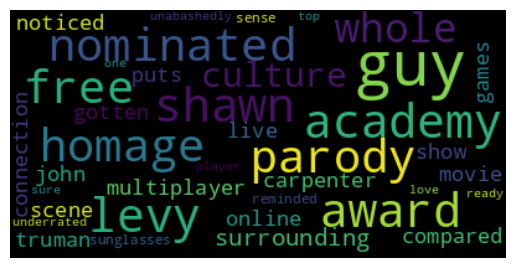

Cluster: 46
IMDB Review Links
https://www.imdb.com/review/rw7999344/
IMDB Review Texts


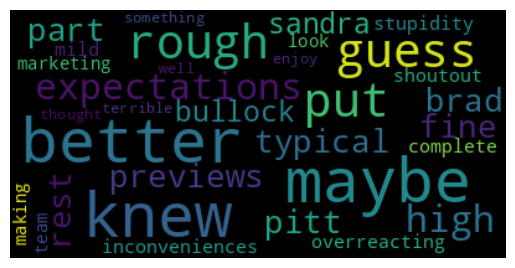

Cluster: 47
IMDB Review Links
https://www.imdb.com/review/rw7226928/
https://www.imdb.com/review/rw7432411/
IMDB Review Texts


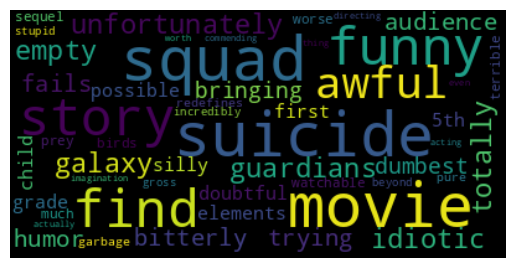

Cluster: 48
IMDB Review Links
https://www.imdb.com/review/rw4602468/
IMDB Review Texts


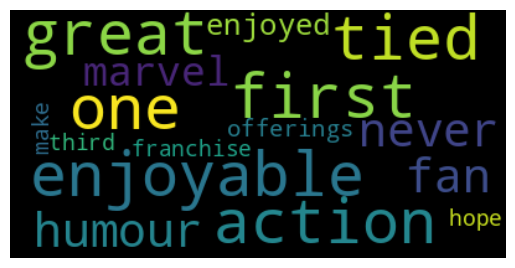

Cluster: 49
IMDB Review Links
https://www.imdb.com/review/rw3416540/
IMDB Review Texts


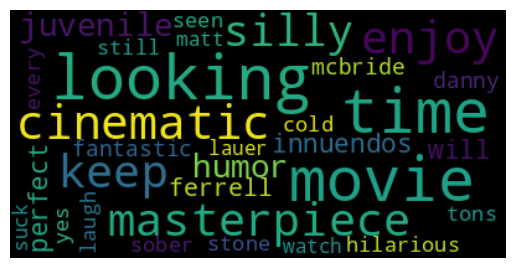

Cluster: 50
IMDB Review Links
https://www.imdb.com/review/rw8313711/
IMDB Review Texts


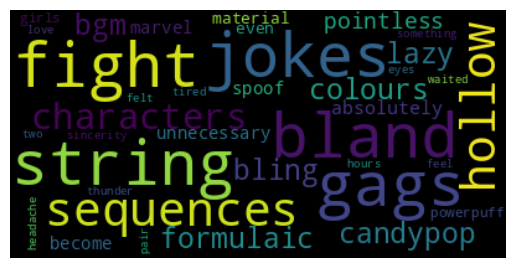

Cluster: 51
IMDB Review Links
https://www.imdb.com/review/rw8310746/
IMDB Review Texts


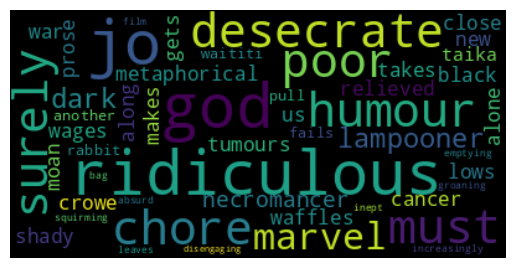

Cluster: 52
IMDB Review Links
https://www.imdb.com/review/rw2078113/
IMDB Review Texts


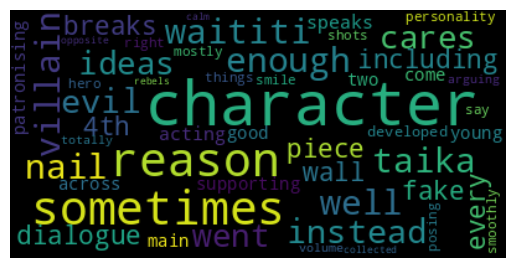

Cluster: 53
IMDB Review Links
https://www.imdb.com/review/rw7636810/
IMDB Review Texts


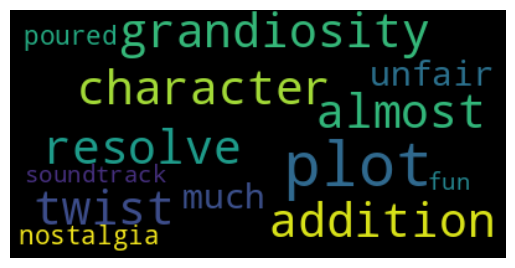

Cluster: 54
IMDB Review Links
https://www.imdb.com/review/rw7336440/
IMDB Review Texts


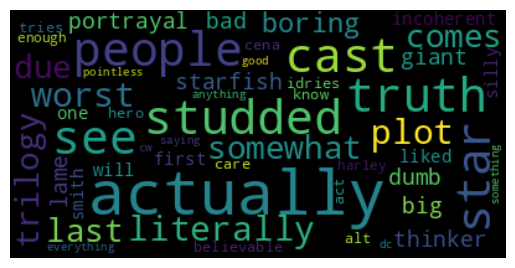

Cluster: 55
IMDB Review Links
https://www.imdb.com/review/rw7209276/
https://www.imdb.com/review/rw7262327/
https://www.imdb.com/review/rw7258075/
IMDB Review Texts


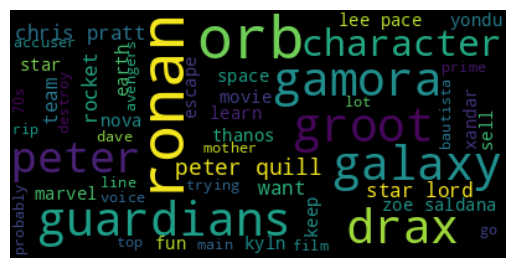

Cluster: 56
IMDB Review Links
https://www.imdb.com/review/rw4064836/
IMDB Review Texts


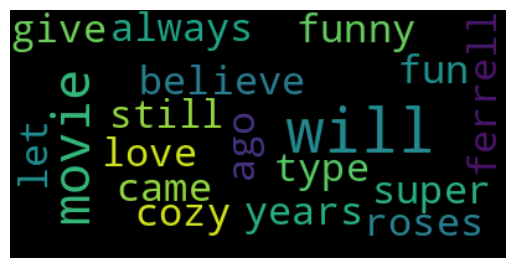

Cluster: 57
IMDB Review Links
https://www.imdb.com/review/rw3598955/
IMDB Review Texts


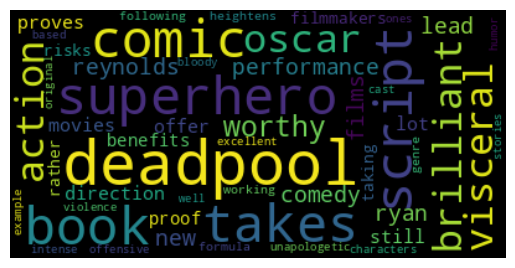

Cluster: 58
IMDB Review Links
https://www.imdb.com/review/rw8000197/
IMDB Review Texts


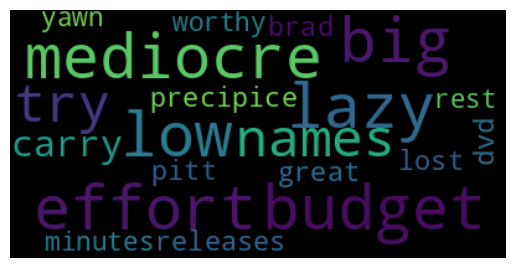

Cluster: 59
IMDB Review Links
https://www.imdb.com/review/rw8334081/
IMDB Review Texts


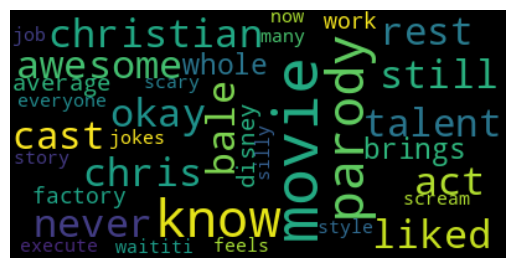

In [15]:
for k in range(0,true_k):
    s=df[df.cluster==k]
    text=s['reviews'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text)
    print('Cluster: {}'.format(k))
    print('IMDB Review Links')
    revs=df[df.cluster==k]['permalinks']
    print(revs.to_string(index=False))
    print('IMDB Review Texts')
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()